# Antmaze Medium Experimentation

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.append('../')

In [3]:
PATH = '../../scratch/aorl/e2e_maze_4_7/sd000_1403204721481.s_28162052_1.20250916_121808_823.e2e_maze_4_7'
RUN_NAME = 'sd000_1403204721481.s_28162052_1.20250916_121808_823.e2e_maze_4_7'
PROJECT_NAME = 'aorl'
ENTITY = 'moma1234'

In [4]:
import wandb
api = wandb.Api()
run = api.runs(f'{ENTITY}/{PROJECT_NAME}', filters={'display_name': f'{RUN_NAME}'})[0]

In [5]:
from utils.flax_utils import restore_agent, save_agent
from agents import agents

config = run.config['agent']
agent_class = agents[config['agent_name']]

In [ ]:
from utils.datasets import GCDataset, Dataset
import pathlib
from wrappers.datafuncs_utils import make_env_and_datasets

# DATA_STEP = 100000

# dataset_path = pathlib.Path(PATH) / f'data-{DATA_STEP}.npz'
dataset_path = '../../scratch/data/antmaze-medium-navigate-v0/antmaze-medium-navigate-v0.npz'
env, train_dataset, val_dataset = make_env_and_datasets(run.config['env_name'], dataset_path=str(dataset_path), use_oracle_reps=True)
dataset_class = GCDataset
train_dataset = dataset_class(Dataset.create(**train_dataset, freeze=False), config)

/home/jennifer/miniconda3/envs/aorl/lib/python3.10/site-packages/Cython/Distutils/old_build_ext.py:15: DeprecationWarning: dep_util is Deprecated. Use functions from setuptools instead.
  from distutils.dep_util import newer, newer_group
/home/jennifer/miniconda3/envs/aorl/lib/python3.10/site-packages/Cython/Distutils/old_build_ext.py:15: DeprecationWarning: dep_util is Deprecated. Use functions from setuptools instead.
  from distutils.dep_util import newer, newer_group
<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


In [8]:
save_dir = PATH
step = 2000000

example_batch = train_dataset.sample(1)
agent = agent_class.create(
    run.config['seed'],
    example_batch,
    config
)

agent = restore_agent(agent, save_dir, step)

Restored from ../../scratch/aorl/e2e_maze_4_7/sd000_1403204721481.s_28162052_1.20250916_121808_823.e2e_maze_4_7/params_2000000.pkl


In [10]:
run.config['env_name']

'antmaze-medium-navigate-oraclerep-v0'

In [11]:
from env_wrappers import MazeEnvWrapper

env = MazeEnvWrapper(env)

all_cells = env.all_cells

In [12]:
def plot_heatmap(data, xlabel, ylabel, title, include_labels=False):
    # your dict (example)
    d = data

    # --- build grid ---
    xs = np.array([x for (x, y) in d.keys()], dtype=float)
    ys = np.array([y for (x, y) in d.keys()], dtype=float)

    x_min, x_max = int(np.floor(xs.min())), int(np.ceil(xs.max()))
    y_min, y_max = int(np.floor(ys.min())), int(np.ceil(ys.max()))

    # edges for 1x1 squares: [x_min, x_min+1, ..., x_max+1]
    x_edges = np.arange(x_min, x_max + 2, 1)
    y_edges = np.arange(y_min, y_max + 2, 1)

    # cell values (ny rows by nx cols); use NaN for "missing" cells
    Z = np.full((len(y_edges) - 1, len(x_edges) - 1), np.nan, dtype=float)

    # fill Z: row index corresponds to y, col index corresponds to x
    for (x, y), val in d.items():
        i = int(round(x)) - x_min  # column
        j = int(round(y)) - y_min  # row
        Z[j, i] = val

    # --- plot ---
    fig, ax = plt.subplots(figsize=(6, 6))
    m = ax.pcolormesh(x_edges, y_edges, Z, shading="flat")  # cells are 1x1 by construction
    fig.colorbar(m, ax=ax, label="density")

    plt.scatter(x=all_cells[:, 0], y=all_cells[:, 1], s=10, c='gray', alpha=1.0)
    if include_labels:
        for i in range(len(all_cells)):
            plt.annotate(f'{(all_cells[i, 0], all_cells[i, 1])}', (all_cells[i, 0], all_cells[i, 1]), xytext=(2, 2), textcoords='offset points', c='gray')

    ax.set_aspect("equal")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    plt.show()

## Loading the Dataset

In [14]:
import numpy as np
training_data = np.load(dataset_path)

In [17]:
train_dataset.size

1000000

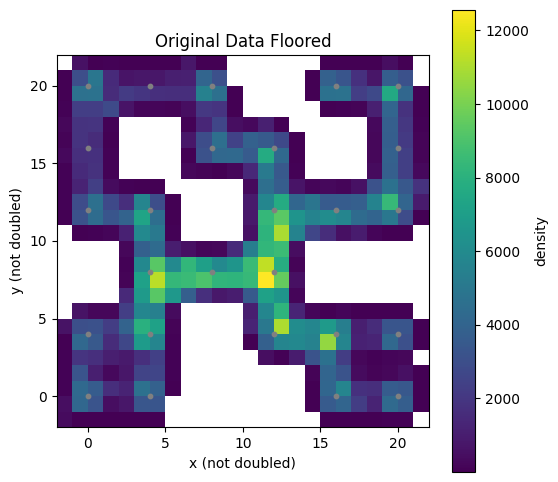

In [15]:
original_data_floored = {}
floored = np.floor(training_data['observations'])

for i in range(len(floored)):
    rounded = (floored[i][0], floored[i][1])
    if rounded in original_data_floored:
        original_data_floored[rounded] += 1
    else:
        original_data_floored[rounded] = 1

plot_heatmap(original_data_floored, 'x (not doubled)', 'y (not doubled)', 'Original Data Floored')

I feel like this looks an awful lot like the stationary distribution.

In [18]:
original_data_floored.keys()

dict_keys([(3.0, -1.0), (3.0, 0.0), (3.0, 1.0), (3.0, 2.0), (3.0, 3.0), (2.0, 3.0), (3.0, 4.0), (3.0, 5.0), (3.0, 6.0), (4.0, 6.0), (5.0, 6.0), (5.0, 7.0), (6.0, 7.0), (6.0, 8.0), (7.0, 8.0), (7.0, 7.0), (8.0, 7.0), (8.0, 8.0), (9.0, 7.0), (10.0, 7.0), (11.0, 8.0), (12.0, 8.0), (12.0, 9.0), (11.0, 9.0), (12.0, 10.0), (11.0, 10.0), (13.0, 10.0), (13.0, 11.0), (14.0, 11.0), (15.0, 11.0), (16.0, 11.0), (16.0, 12.0), (17.0, 11.0), (18.0, 11.0), (18.0, 12.0), (19.0, 11.0), (19.0, 12.0), (19.0, 13.0), (19.0, 14.0), (18.0, 15.0), (19.0, 15.0), (18.0, 16.0), (19.0, 16.0), (19.0, 17.0), (18.0, 18.0), (19.0, 18.0), (18.0, 19.0), (19.0, 19.0), (20.0, 19.0), (20.0, 20.0), (19.0, 20.0), (20.0, 18.0), (20.0, 17.0), (20.0, 16.0), (20.0, 15.0), (20.0, 14.0), (20.0, 13.0), (20.0, 12.0), (14.0, 12.0), (13.0, 12.0), (12.0, 12.0), (11.0, 7.0), (11.0, 6.0), (11.0, 5.0), (12.0, 5.0), (12.0, 4.0), (13.0, 4.0), (14.0, 4.0), (15.0, 4.0), (16.0, 4.0), (16.0, 3.0), (15.0, 3.0), (16.0, 2.0), (-1.0, 0.0), (-1.0, 1

In [19]:
START_XY = (12.0, 8.0)
GOAL_XYS = list(original_data_floored.keys())
START_IJ = env.unwrapped.xy_to_ij(START_XY)

task_infos = []

# for goal_xy in GOAL_XYS:
for i in range(4):
    goal_xy = GOAL_XYS[i]
    task_info = {
        'task_name': f'{goal_xy}',
        'init_ij': START_IJ,
        'init_xy': START_XY,
        'goal_ij': env.unwrapped.xy_to_ij(goal_xy),
        'goal_xy': goal_xy
    }

    task_infos.append(task_info)

In [25]:
env.task_infos = task_infos
eval_metrics, all_trajs = env.evaluate_step(agent=agent, config=config, eval_episodes=1, return_trajs=True)

  0%|          | 0/4 [00:00<?, ?it/s]2026-02-02 10:52:32.320054: W external/xla/xla/stream_executor/cuda/cuda_command_buffer.cc:725] Retry CUDA graph instantiation after OOM error
E0202 10:52:32.321380 2864560 pjrt_stream_executor_client.cc:2916] Execution of replica 0 failed: RESOURCE_EXHAUSTED: Underlying backend ran out of memory trying to instantiate command buffer with 12 (total of 0 alive graphs in the process). You can try to (a) Give more memory to the driver by reducing XLA_CLIENT_MEM_FRACTION (b) Disable command buffers with 'XLA_FLAGS=--xla_gpu_enable_command_buffer=' (empty set). Original error: Failed to instantiate CUDA graph: CUDA_ERROR_OUT_OF_MEMORY: out of memory
  0%|          | 0/4 [00:00<?, ?it/s]


XlaRuntimeError: RESOURCE_EXHAUSTED: Underlying backend ran out of memory trying to instantiate command buffer with 12 (total of 0 alive graphs in the process). You can try to (a) Give more memory to the driver by reducing XLA_CLIENT_MEM_FRACTION (b) Disable command buffers with 'XLA_FLAGS=--xla_gpu_enable_command_buffer=' (empty set). Original error: Failed to instantiate CUDA graph: CUDA_ERROR_OUT_OF_MEMORY: out of memory

In [21]:
# all_trajs

In [22]:
# eval_metrics

In [23]:
# np.array(all_trajs['evaluation/(3.0, 7.0)'][0]['observation']).shape

(2.0, 9.0)


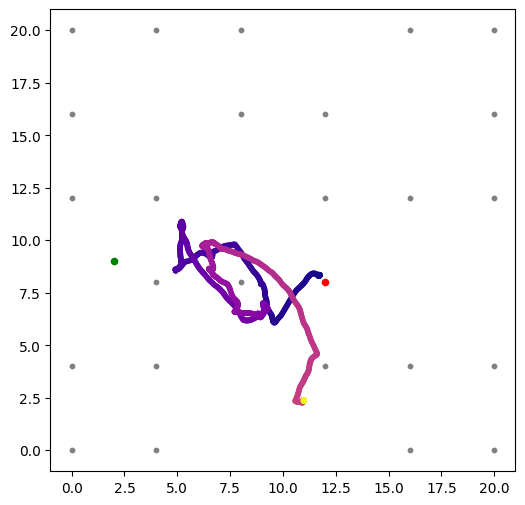

In [18]:
plt.figure(figsize=(6, 6))

plt.scatter(x=all_cells[:, 0], y=all_cells[:, 1], s=10, c='gray', alpha=1.0)
# for i in range(len(all_cells)):
#     plt.annotate(f'{(all_cells[i, 0], all_cells[i, 1])}', (all_cells[i, 0], all_cells[i, 1]), xytext=(2, 2), textcoords='offset points', c='gray')

plt.scatter(x=[START_XY[0]], y=[START_XY[1]], s=20, c='red')


# for k, v in all_trajs.items():
k = list(all_trajs.keys())[3]
goal_xy = eval(k[11 : ])
print(goal_xy)
x = np.array(all_trajs[k][0]['observation'])[:, 0]
y = np.array(all_trajs[k][0]['observation'])[:, 1]

plt.scatter(x=x, y=y, c=range(len(x)), cmap='plasma', s=10)
plt.scatter(x=[goal_xy[0]], y=[goal_xy[1]], c='green', s=20)

plt.show()

## Starting from a Corner Location

In [19]:
START_XY = (0.0, 20.0)
GOAL_XYS = list(original_data_floored.keys())
START_IJ = env.unwrapped.xy_to_ij(START_XY)

task_infos = []

# for goal_xy in GOAL_XYS:
for i in range(4):
    goal_xy = GOAL_XYS[i]
    task_info = {
        'task_name': f'{goal_xy}',
        'init_ij': START_IJ,
        'init_xy': START_XY,
        'goal_ij': env.unwrapped.xy_to_ij(goal_xy),
        'goal_xy': goal_xy
    }

    task_infos.append(task_info)

env.task_infos = task_infos
eval_metrics, all_trajs = env.evaluate_step(agent=agent, config=config, eval_episodes=1, return_trajs=True)

100%|██████████| 4/4 [00:16<00:00,  4.22s/it]


In [20]:
eval_metrics

{'evaluation/(3.0, 7.0)_success': 0.0,
 'evaluation/(3.0, 8.0)_success': 1.0,
 'evaluation/(3.0, 9.0)_success': 0.0,
 'evaluation/(2.0, 9.0)_success': 1.0,
 'evaluation/overall_success': 0.5}

(3.0, 7.0)


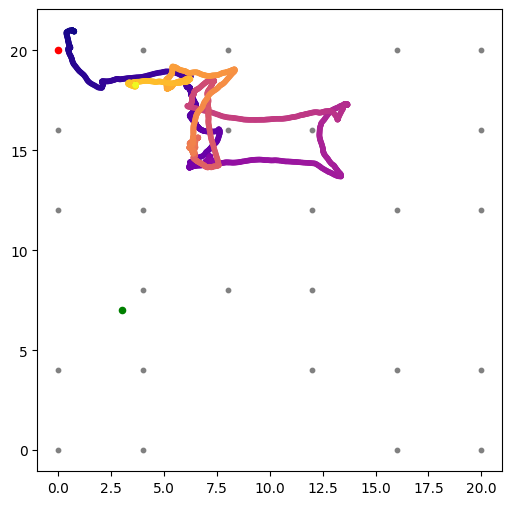

In [21]:
plt.figure(figsize=(6, 6))

plt.scatter(x=all_cells[:, 0], y=all_cells[:, 1], s=10, c='gray', alpha=1.0)

plt.scatter(x=[START_XY[0]], y=[START_XY[1]], s=20, c='red')


# for k, v in all_trajs.items():
k = list(all_trajs.keys())[0]
goal_xy = eval(k[11 : ])
print(goal_xy)
x = np.array(all_trajs[k][0]['observation'])[:, 0]
y = np.array(all_trajs[k][0]['observation'])[:, 1]

plt.scatter(x=x, y=y, c=range(len(x)), cmap='plasma', s=10)
plt.scatter(x=[goal_xy[0]], y=[goal_xy[1]], c='green', s=20)

plt.show()

## Plotting Other Metrics

In [22]:
config['num_qs']

10

In [23]:
import jax
from utils.evaluation import supply_rng

actor_fn = supply_rng(agent.sample_actions, rng=jax.random.PRNGKey(np.random.randint(0, 2**32)))

In [24]:
from tqdm import tqdm

In [25]:
import copy

START_XY = (12.0, 8.0)
GOAL_XYS = GOAL_XYS

values = {}
sample = train_dataset.sample(1)

# curr_observation = sample['observations'][0, :]
curr_observation = copy.deepcopy(train_dataset.dataset['observations'][0, :])
curr_observation[0] = START_XY[0]
curr_observation[1] = START_XY[1]

for goal_xy in tqdm(GOAL_XYS):
    if goal_xy != START_XY:
        goal = np.array(goal_xy)
        action = actor_fn(
            observations=curr_observation,
            goals=goal,
            temperature=0.0,
        )
        value = agent.network.select('critic')(observations=curr_observation, goals=goal, actions=action)
        values[goal_xy] = np.average(value)

100%|██████████| 416/416 [00:47<00:00,  8.82it/s]


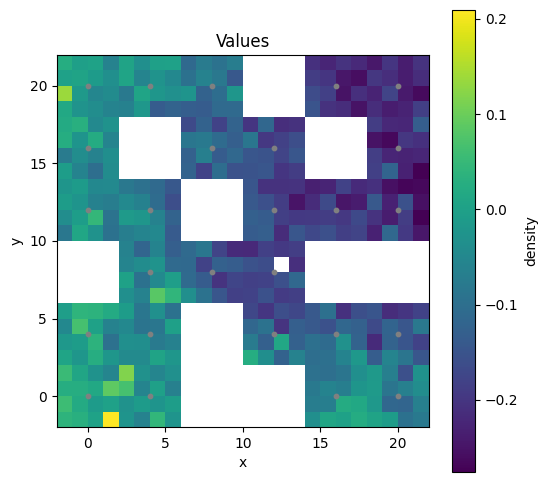

In [26]:
plot_heatmap(values, 'x', 'y', 'Values')

In [27]:
agent

GCFQLAgent(rng=Array([2413673579,  463552374], dtype=uint32), network=TrainState(step=Array(1000001, dtype=int32, weak_type=True), apply_fn=<bound method Module.apply of ModuleDict(
    # attributes
    modules = {'critic': GCValue(
        # attributes
        hidden_dims = [512, 512, 512, 512]
        output_dim = None
        mlp_class = MLP
        layer_norm = True
        num_ensembles = 10
        gc_encoder = None
    ), 'target_critic': GCValue(
        # attributes
        hidden_dims = [512, 512, 512, 512]
        output_dim = None
        mlp_class = MLP
        layer_norm = True
        num_ensembles = 10
        gc_encoder = None
    ), 'actor_bc_flow': ActorVectorField(
        # attributes
        hidden_dims = [512, 512, 512, 512]
        action_dim = 21
        mlp_class = MLP
        activate_final = False
        layer_norm = True
        gc_encoder = None
    ), 'actor_onestep_flow': ActorVectorField(
        # attributes
        hidden_dims = [512, 512, 512, 512]


## Computing the Stationary Distribution

In [26]:
cells = list(original_data_floored.keys())

neighbors = {}

for (cell_x, cell_y) in cells:
    neighbors[(cell_x, cell_y)] = set()
    if (cell_x + 1.0, cell_y) in cells:
        neighbors[(cell_x, cell_y)].add((cell_x + 1.0, cell_y))
    if (cell_x, cell_y + 1.0) in cells:
        neighbors[(cell_x, cell_y)].add((cell_x, cell_y + 1.0))
    if (cell_x - 1.0, cell_y) in cells:
        neighbors[(cell_x, cell_y)].add((cell_x - 1.0, cell_y))
    if (cell_x, cell_y - 1.0) in cells:
        neighbors[(cell_x, cell_y)].add((cell_x, cell_y - 1.0))

    # if (cell_x + 1.0, cell_y + 1.0) in cells:
    #     neighbors[(cell_x, cell_y)].add((cell_x + 1.0, cell_y + 1.0))
    # if (cell_x - 1.0, cell_y + 1.0) in cells:
    #     neighbors[(cell_x, cell_y)].add((cell_x - 1.0, cell_y + 1.0))
    # if (cell_x - 1.0, cell_y - 1.0) in cells:
    #     neighbors[(cell_x, cell_y)].add((cell_x - 1.0, cell_y - 1.0))
    # if (cell_x + 1.0, cell_y - 1.0) in cells:
    #     neighbors[(cell_x, cell_y)].add((cell_x + 1.0, cell_y - 1.0))


In [27]:
degrees = {}

for k, v in neighbors.items():
    degrees[k] = len(v)

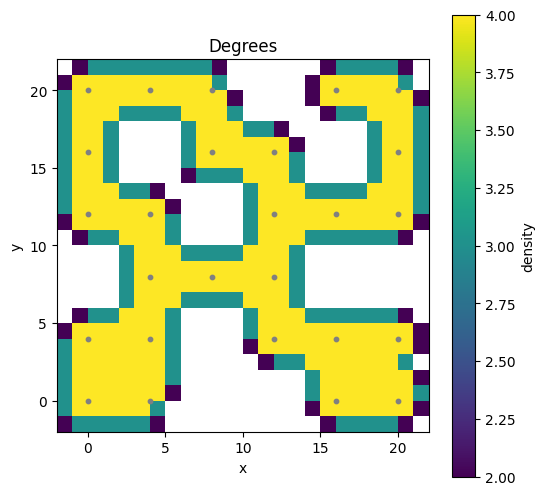

In [28]:
plot_heatmap(degrees, 'x', 'y', 'Degrees')

In [31]:
import random

STEPS = 10000000

curr = (8.0, 8.0)
stats = {}

for _ in range(STEPS):
    if curr in stats:
        stats[curr] += 1
    else:
        stats[curr] = 1
    curr = random.choice(list(neighbors[curr]))

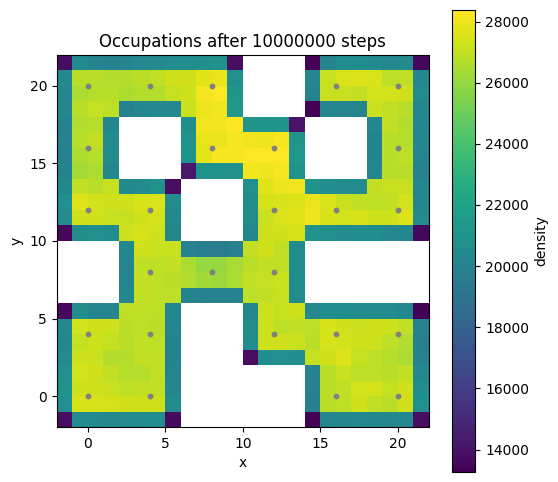

In [32]:
plot_heatmap(stats, 'x', 'y', f'Occupations after {STEPS} steps')

## Geodesic Betweenness

In [33]:
import queue

def bfs(start, end, neighbors):
    parents = {}
    visited = {}
    
    curr = start
    q = queue.Queue()

    while curr != end:
        if curr not in visited:
            visited[curr] = True
            for n in neighbors[curr]:
                if not n in parents:
                    q.put(n)
                    parents[n] = curr

        if q.empty():
            return None
        else:
            curr = q.get()

    path = []
    while curr != start:
        path.append(curr)
        curr = parents[curr]

    path.append(curr)

    return path[::-1]

In [34]:
print(cells[0], cells[40])

(3.0, 7.0) (0.0, 3.0)


In [35]:
path = np.array(bfs(cells[0], cells[40], neighbors=neighbors))

In [36]:
all_cells_temp = np.array(list(neighbors.keys()))

In [37]:
all_cells_temp

array([[ 3.,  7.],
       [ 3.,  8.],
       [ 3.,  9.],
       [ 2.,  9.],
       [ 2., 10.],
       [ 2., 11.],
       [ 1., 11.],
       [ 1., 12.],
       [ 0., 12.],
       [ 0., 13.],
       [-1., 13.],
       [-2., 13.],
       [-2., 12.],
       [-2., 11.],
       [-2., 10.],
       [-1., 10.],
       [ 0., 10.],
       [ 0., 11.],
       [-1., 11.],
       [ 1., 10.],
       [ 1., 13.],
       [ 0., 14.],
       [-1., 14.],
       [-2., 14.],
       [-1., 12.],
       [ 1., 14.],
       [ 3., 10.],
       [ 4.,  9.],
       [ 4.,  8.],
       [ 5.,  8.],
       [ 5.,  7.],
       [ 5.,  6.],
       [ 6.,  6.],
       [ 4.,  6.],
       [ 3.,  6.],
       [ 3.,  5.],
       [ 2.,  5.],
       [ 2.,  4.],
       [ 1.,  4.],
       [ 1.,  3.],
       [ 0.,  3.],
       [ 0.,  2.],
       [ 0.,  1.],
       [-1.,  1.],
       [-1.,  0.],
       [-1., -1.],
       [-1., -2.],
       [ 0., -1.],
       [ 0.,  0.],
       [ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 2.,

In [38]:
import pickle

with open('cells.pkl', 'wb') as f:
    pickle.dump(all_cells_temp, f)

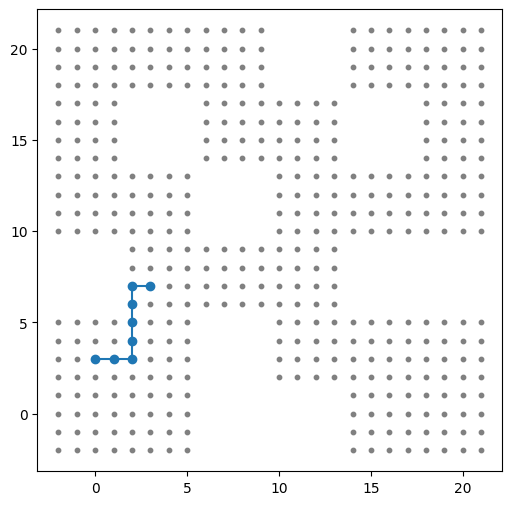

In [39]:
plt.figure(figsize=(6, 6))

plt.plot(path[:, 0], path[:, 1], marker='o', linestyle='-')
plt.scatter(x=all_cells_temp[:, 0], y=all_cells_temp[:, 1], s=10, c='gray', alpha=1.0)
plt.show()

In [40]:
from tqdm import trange

all_paths = []

for i in trange(len(cells)):
    starts = cells[i]
    for j in range(len(cells[i + 1 :])):
        ends = cells[j]
        path = bfs(starts, ends, neighbors)
        all_paths.extend(path)

100%|██████████| 416/416 [01:47<00:00,  3.88it/s]


In [41]:
path_counts = {}
for point in all_paths:
    if point in path_counts:
        path_counts[point] += 1
    else:
        path_counts[point] = 1

In [42]:
all_cells = env.all_cells

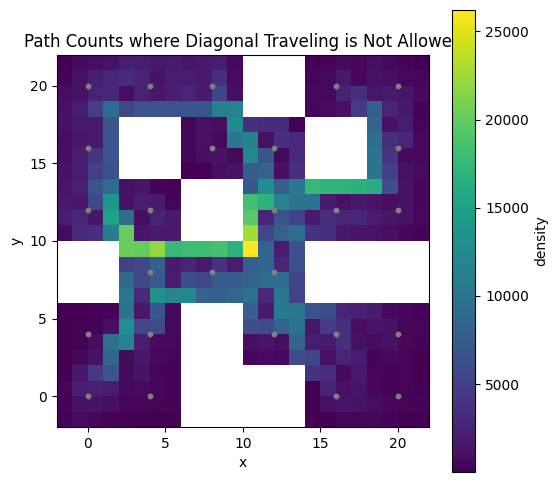

In [43]:
plot_heatmap(path_counts, 'x', 'y', 'Path Counts where Diagonal Traveling is Not Allowed')

## Calculating Points for Data Collection

In [44]:
task_start = (0.0, 0.0)
task_end = (15.0, 20.0)

path = np.array(bfs(task_start, task_end, neighbors))

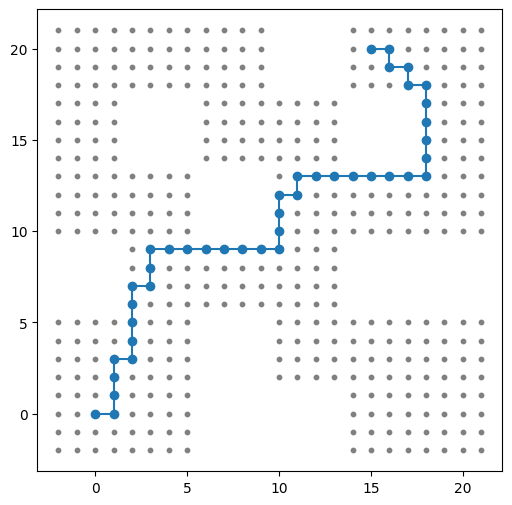

In [45]:
plt.figure(figsize=(6, 6))

plt.plot(path[:, 0], path[:, 1], marker='o', linestyle='-')
plt.scatter(x=all_cells_temp[:, 0], y=all_cells_temp[:, 1], s=10, c='gray', alpha=1.0)
plt.show()

In [46]:
chosen = path[np.random.choice(range(len(path)), size=5)]

In [47]:
chosen

array([[ 3.,  8.],
       [ 9.,  9.],
       [14., 13.],
       [ 0.,  0.],
       [ 5.,  9.]])

array([[ 1.,  2.],
       [18., 16.],
       [ 4.,  9.],
       [16., 19.],
       [10., 11.]])


run commands:
```
python simulation_3.py --task_start '(0.0, 0,0)' --task_end '(15.0, 20.0)' --waypoint '(1.0, 2.0)' --collection_steps 100 --train_steps 100 --eval_interval 50 --debug
```

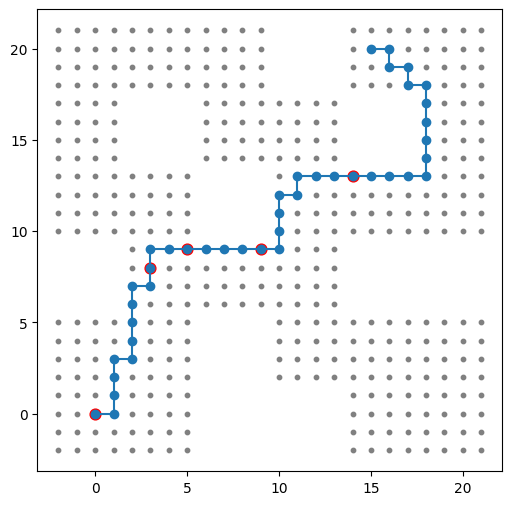

In [48]:
plt.figure(figsize=(6, 6))

plt.plot(path[:, 0], path[:, 1], marker='o', linestyle='-')
plt.scatter(chosen[:, 0], chosen[:, 1], s=60, color='red')
plt.scatter(x=all_cells_temp[:, 0], y=all_cells_temp[:, 1], s=10, c='gray', alpha=1.0)
plt.show()

## Computing Waypoints for the Second Task

In [49]:
task_start = (0.0, 20.0)
task_end = (20.0, 0.0)

path = np.array(bfs(task_start, task_end, neighbors))

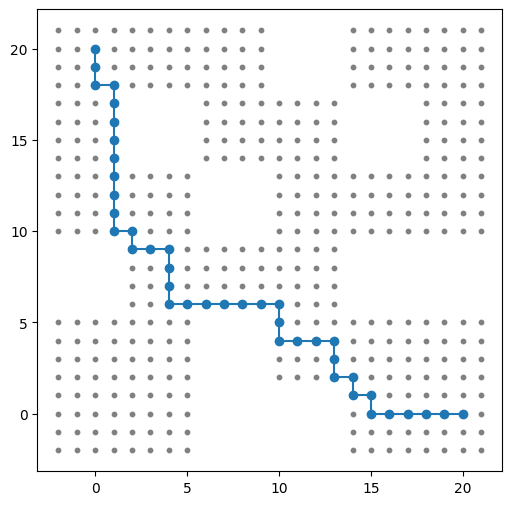

In [50]:
plt.figure(figsize=(6, 6))

plt.plot(path[:, 0], path[:, 1], marker='o', linestyle='-')
plt.scatter(x=all_cells_temp[:, 0], y=all_cells_temp[:, 1], s=10, c='gray', alpha=1.0)
plt.show()

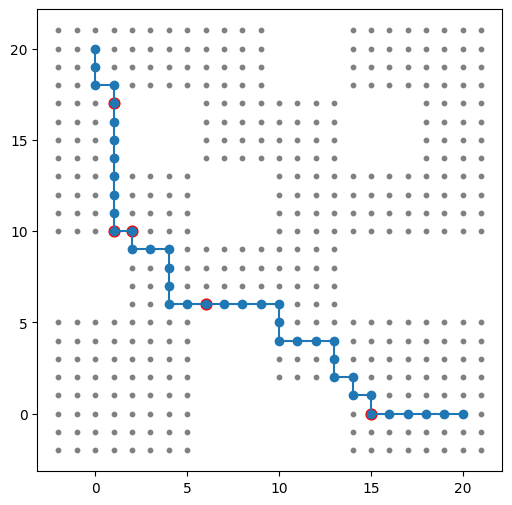

In [51]:
chosen = path[np.random.choice(range(len(path)), size=5)]

plt.figure(figsize=(6, 6))

plt.plot(path[:, 0], path[:, 1], marker='o', linestyle='-')
plt.scatter(chosen[:, 0], chosen[:, 1], s=60, color='red')
plt.scatter(x=all_cells_temp[:, 0], y=all_cells_temp[:, 1], s=10, c='gray', alpha=1.0)
plt.show()

In [52]:
output_string = []
for coord in chosen:
    # "\"(1.0, 2.0)\""
    temp = f"({coord[0]}, {coord[1]})"
    temp = r'"\"' + temp + r'"\"'
    output_string.append(temp)
    # output_string.append(f'"/"({coord[0]}, {coord[1]})/""'.replace('/', r"\"))
tuple(output_string)

('"\\"(15.0, 0.0)"\\"',
 '"\\"(2.0, 10.0)"\\"',
 '"\\"(6.0, 6.0)"\\"',
 '"\\"(1.0, 10.0)"\\"',
 '"\\"(1.0, 17.0)"\\"')

array([[ 4.,  9.],
       [ 0., 20.],
       [ 4.,  6.],
       [15.,  0.],
       [10.,  6.]])

## Easier Tasks to Run

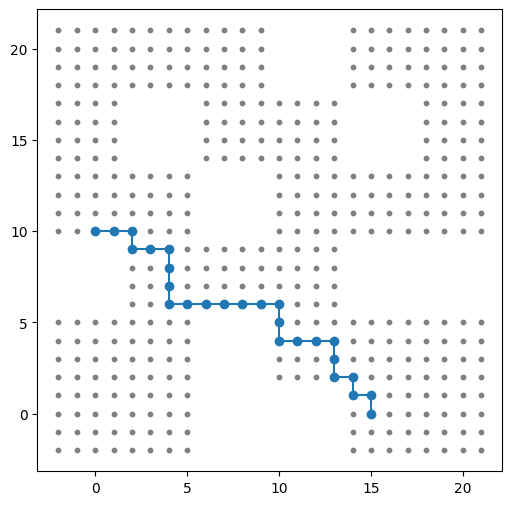

In [53]:
task_start = (0.0, 10.0)
task_end = (15.0, 0.0)

path = np.array(bfs(task_start, task_end, neighbors))
plt.figure(figsize=(6, 6))

plt.plot(path[:, 0], path[:, 1], marker='o', linestyle='-')
plt.scatter(x=all_cells_temp[:, 0], y=all_cells_temp[:, 1], s=10, c='gray', alpha=1.0)
plt.show()

In [1]:
chosen = path[np.random.choice(range(len(path)), size=5)]

plt.figure(figsize=(6, 6))

plt.plot(path[:, 0], path[:, 1], marker='o', linestyle='-')
plt.scatter(chosen[:, 0], chosen[:, 1], s=60, color='red')
plt.scatter(x=all_cells_temp[:, 0], y=all_cells_temp[:, 1], s=10, c='gray', alpha=1.0)
plt.show()

NameError: name 'path' is not defined

In [60]:
output_string = []
for coord in chosen:
    # "\"(1.0, 2.0)\""
    temp = f"({coord[0]}, {coord[1]})"
    temp = r'"\"' + temp + r'"\"'
    output_string.append(temp)
    # output_string.append(f'"/"({coord[0]}, {coord[1]})/""'.replace('/', r"\"))
tuple(output_string)

('"\\"(10.0, 6.0)"\\"',
 '"\\"(10.0, 5.0)"\\"',
 '"\\"(13.0, 3.0)"\\"',
 '"\\"(2.0, 9.0)"\\"',
 '"\\"(14.0, 1.0)"\\"')

## Data Collection with Resets

In [54]:
data_collection_env = make_env_and_datasets(
                        run.config['env_name'], dataset_path='', env_only=True, 
                        use_oracle_reps=True,
                        terminate_at_goal=False,
                        max_episode_steps=2000,
                    )

In [55]:
train_dataset.size

999500

In [56]:
train_dataset.dataset

FrozenDict({
    observations: array([[ 3.593619  ,  7.3534546 ,  0.3433397 , ...,  0.06006194,
             0.03239994, -0.01418945],
           [ 3.594163  ,  7.360181  ,  0.23534448, ..., -5.2085123 ,
             5.104777  , 13.039388  ],
           [ 3.597121  ,  7.3710475 ,  0.07505213, ..., -6.519201  ,
            -0.903836  , -5.4463196 ],
           ...,
           [ 6.8992596 ,  7.827904  ,  0.18703823, ...,  1.3490127 ,
             7.9755235 , -0.09959759],
           [ 6.9780955 ,  7.80737   ,  0.15334238, ...,  0.5139585 ,
             4.0734043 ,  0.03362038],
           [ 7.064119  ,  7.785346  ,  0.1182857 , ...,  0.2651478 ,
             6.7125583 , -0.03258616]], dtype=float32),
    actions: array([[-4.62048739e-01, -6.24583244e-01,  3.66875470e-01, ...,
            -8.82976592e-01,  6.10903978e-01,  3.68889809e-01],
           [-2.36824900e-02, -8.23942542e-01,  2.60998696e-01, ...,
            -1.06017157e-01, -6.24153256e-01, -4.93864834e-01],
           [ 2.2975

In [57]:
NUM_ADDITIONAL = 1000000

In [58]:
from wrappers.datafuncs_utils import clip_dataset, make_env_and_datasets

clipped_dataset = clip_dataset(train_dataset.dataset, )

TypeError: clip_dataset() missing 1 required positional argument: 'N'

In [ ]:
train_dataset.add

AttributeError: 'GCDataset' object has no attribute 'add'

In [ ]:
START_XY = (12.0, 8.0)

